# Investment Strategy

In the field of finance, investors often face the challenge of making decisions on their investment strategies. They need to strike a balance between exploring new investment opportunities and exploiting existing ones.

Exploration involves seeking out new markets, sectors, or investment instruments to potentially achieve high returns and diversify their portfolio.

Exploitation, on the other hand, focuses on maximizing returns by capitalizing on well-performing investments with a proven track record.

Thompson Sampling can be used as a decision-making algorithm to tackle this challenge.

In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

  **The dataset provides information about the returns associated with each investment opportunity for 10000 traders**.

In [85]:
# Load your real-life dataset
df = pd.read_excel('Investment_opportinuties_return.xlsx')

In [86]:
df.head()

,Opportunity A,Opportunity B,Opportunity C
0,-0.134266,-0.151816,0.300034
1,0.080835,0.119662,0.313374
2,0.283837,0.168716,-0.141221
3,-0.251042,-0.077942,0.172508
4,0.112482,-0.124553,0.118473


In [87]:
df.describe()

,Opportunity A,Opportunity B,Opportunity C
count,10000.000000,10000.000000,10000.000000
mean,0.059329,0.059475,0.058735
std,0.198495,0.142654,0.262853
min,-0.787878,-0.467733,-0.859693
25%,-0.073696,-0.036342,-0.120554
50%,0.058363,0.058386,0.058414
75%,0.192640,0.156483,0.237903
max,0.858672,0.588158,1.410236


In [88]:
# Calculate the means and variances from the dataset
means = np.mean(df, axis=0)
variances = np.var(df, axis=0)

In [89]:
means

Opportunity A    0.059329
Opportunity B    0.059475
Opportunity C    0.058735
dtype: float64

But can we say that opportunity B is the best ?

Let's have a list of the three opportunities

In [90]:
investment_opportunities = ['Opportunity A', 'Opportunity B', 'Opportunity C']

Now, we can initialize some variables, as usual

In [91]:
N = len(investment_opportunities)
count = np.zeros(N)
sum_rewards = np.zeros(N)
Q = np.zeros(N)
alpha = np.ones(N)
beta = np.ones(N)
num_rounds = df.shape[0]

In [92]:
alpha

array([1., 1., 1.])

Define Thompson Sampling function

In [93]:
def thompson_sampling(alpha, beta):
    samples = [np.random.beta(alpha[i]+1, beta[i]+1) for i in range(N)]
    return np.argmax(samples)

Finally, we can run the def thompson sampling

In [94]:
for trader in range(num_rounds):
    # Select the arm (or opportunity) using Thompson Sampling
    arm = thompson_sampling(alpha, beta)

    # Simulate the reward for the selected arm based on your real-life dataset
    reward = df[investment_opportunities[arm]][trader]

    # Update the counts and sum of rewards for the arm
    count[arm] += 1
    sum_rewards[arm] += reward

    # Update the alpha and beta parameters based on the observed reward
    alpha[arm] += reward
    beta[arm] += (1 - reward)

    # Update the average reward for the arm
    Q[arm] = sum_rewards[arm] / count[arm]

Find the best arm with the highest average reward

In [95]:
best_arm = investment_opportunities[np.argmax(Q)]

print('The optimal arm is:', best_arm)

The optimal arm is: Opportunity A


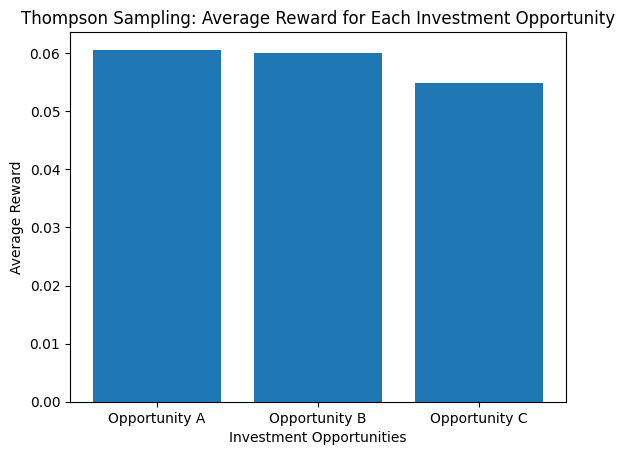

In [96]:
# Plot the average rewards for each investment opportunity

plt.bar(investment_opportunities, Q)
plt.xlabel('Investment Opportunities')
plt.ylabel('Average Reward')
plt.title('Thompson Sampling: Average Reward for Each Investment Opportunity')
plt.show()